# Author : Shraddha Meshram

## Task 2 : Prediction using Unsupervised Machine Learning

## GRIP @ The Sparks Foundation
In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

## Technical Stack : Scikit Learn, Numpy Array, Scipy, Pandas, Matplotlib

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import seaborn as sns
sns.set_palette('husl')
%matplotlib inline

##  Loading the dataset

In [2]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#For overall information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
shape=data.shape

## ANALYSING DATA

In [5]:
# Finding average sepal length
avg_sepal_length=(data['SepalLengthCm'].sum())/(shape[0])
avg_sepal_length

5.843333333333334

In [6]:
# Finding average sepal width
avg_sepal_width=(data['SepalWidthCm'].sum())/(shape[0])
avg_sepal_width

3.0540000000000003

In [7]:
# Finding average petal length
avg_petal_length=(data['PetalLengthCm'].sum())/(shape[0])
avg_petal_length

3.758666666666666

In [8]:
# Finding average petal width
avg_petal_width=(data['PetalWidthCm'].sum())/(shape[0])
avg_petal_width

1.1986666666666668

In [9]:
#Checking the distribution of the target class
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## DATA VISUALIZATION

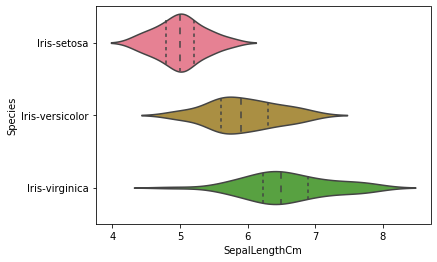

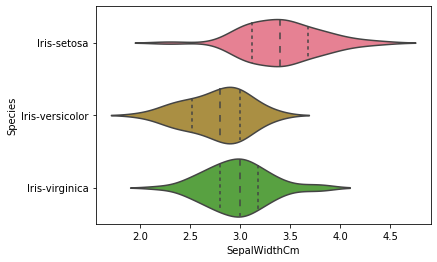

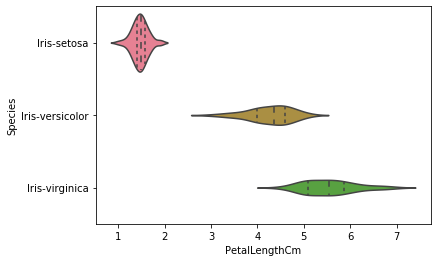

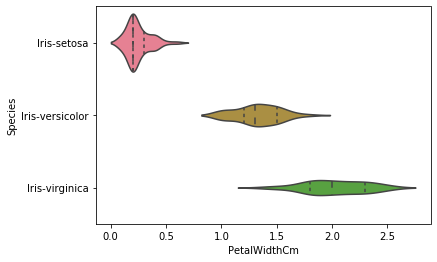

In [10]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

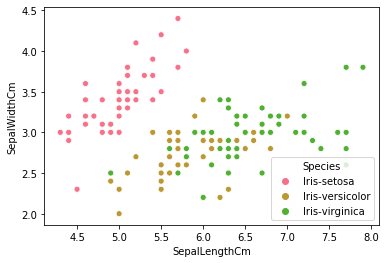

In [11]:
sns.scatterplot(x=data['SepalLengthCm'], y=data['SepalWidthCm'], hue=data['Species'])

From above scatter plot we can see the how length of sepal affect width of sepal in different species. If we analysis sepal length of different species, the order is virginica>versicolor>setosa. And in sepal width, the order is setosa> versiolor and virginica have almost same sepal width.

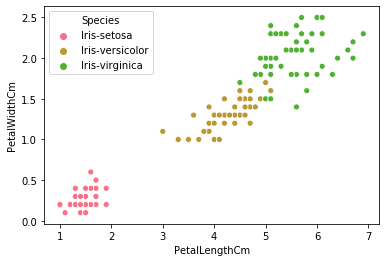

In [12]:
sns.scatterplot(x=data['PetalLengthCm'], y=data['PetalWidthCm'], hue=data['Species'])

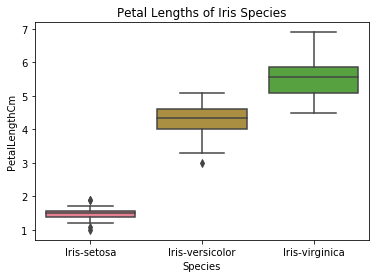

In [13]:
sns.boxplot(y='PetalLengthCm',x='Species',data=data)
plt.title('Petal Lengths of Iris Species')
plt.show()

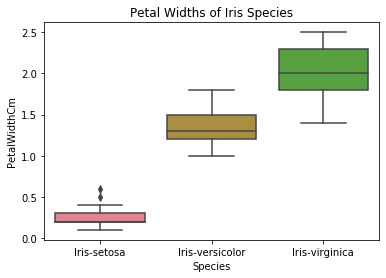

In [14]:
sns.boxplot(y='PetalWidthCm',x='Species',data=data)
plt.title('Petal Widths of Iris Species')
plt.show()

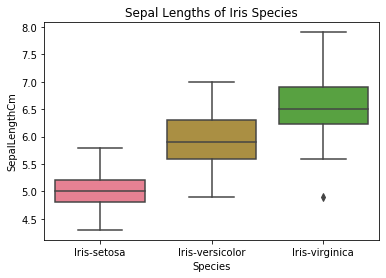

In [15]:
sns.boxplot(y='SepalLengthCm',x='Species',data=data)
plt.title('Sepal Lengths of Iris Species')
plt.show()

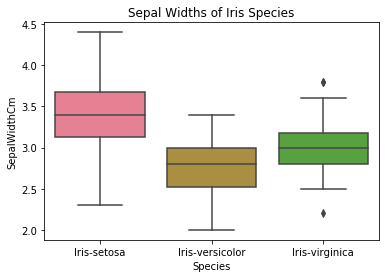

In [16]:
sns.boxplot(y='SepalWidthCm',x='Species',data=data)
plt.title('Sepal Widths of Iris Species')
plt.show()

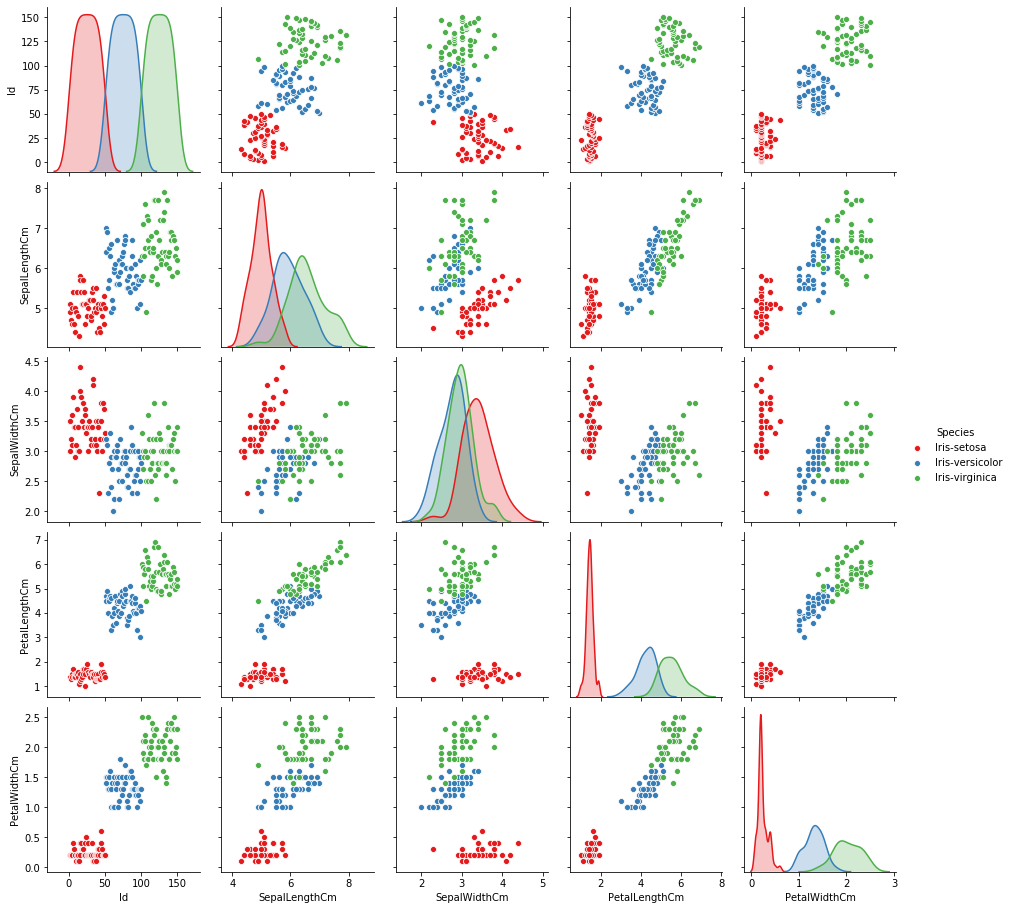

In [17]:
sns.pairplot(data=data,hue="Species",palette="Set1")
plt.show()

After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species. There is some overlap in the pairwise relationships of the other two species, iris-versicolor (orange) and iris-virginica (green).

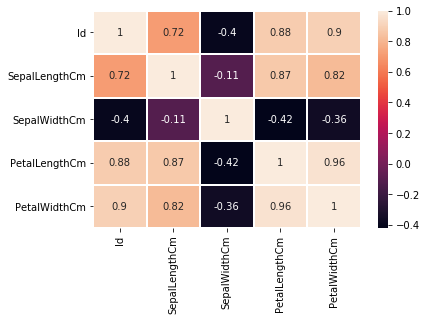

In [18]:
#Heatmap to show correlation between each column

sns.heatmap(data.corr(), linecolor = 'white', linewidths = 1, annot=True)

In [19]:
from mpl_toolkits.mplot3d import Axes3D

In [20]:
X=data.iloc[:,:5]

In [21]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


## Using K-Mapping for clustring

In [22]:
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_

Text(0.5, 0.92, 'K Means Prediction cluster')

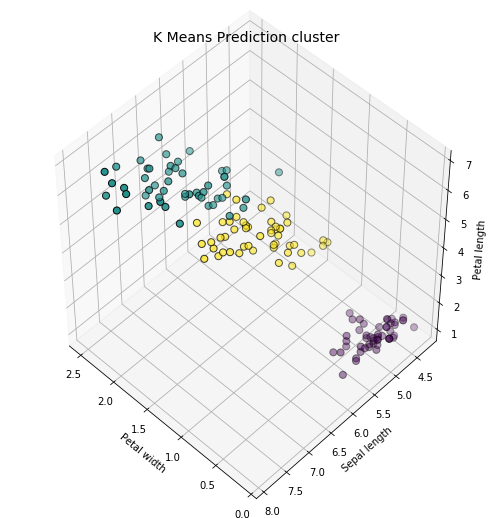

In [23]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,4:5], X.iloc[:,1:2], X.iloc[:,3:4],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means Prediction cluster", fontsize=14)

## Using GaussinMixture for clustering

In [24]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
proba_lists = gmm.predict_proba(X)

Text(0.5, 0.92, 'Gaussian Mixture Prediction Cluster')

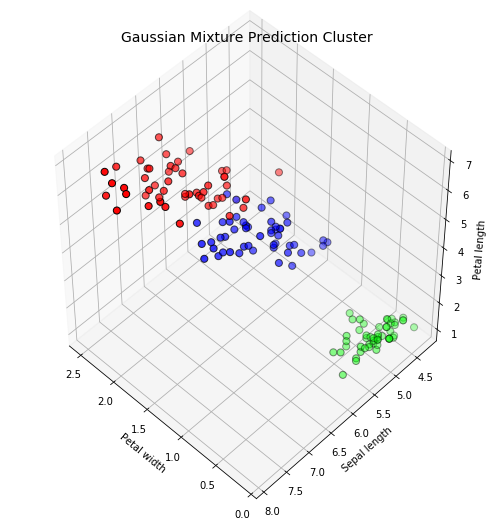

In [25]:
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,4:5], X.iloc[:,1:2], X.iloc[:,3:4],
          c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Gaussian Mixture Prediction Cluster", fontsize=14)

In [27]:
#Dropped unnecessary columns

data.drop("Id",inplace=True,axis=1)
data.drop("Species",inplace=True,axis=1)

## FINDING OPTIMUM NUMBER OF CLUSTERS THROUGH THE ELBOW METHOD

In [28]:
# Calculating the within-cluster sum of square

within_cluster_sum_of_square = []
x = data.iloc[:, [0, 1, 2, 3]].values

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    within_cluster_sum_of_square.append(km.inertia_)

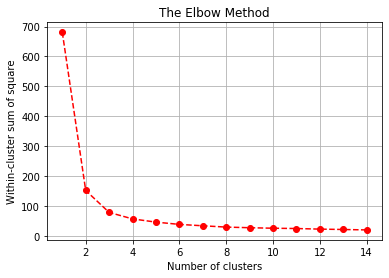

In [29]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

In [30]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(data)

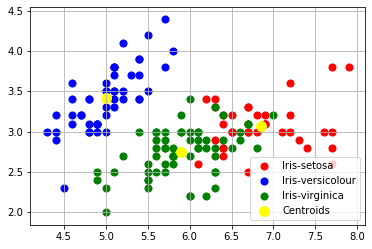

In [31]:
# Visualising the clusters 

plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'YELLOW', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

## Conclusion

### I was able to successfully carry-out prediction using Unsupervised Machine Learning task and obtained the optimum number of clusters as 3.

## Thank You